In [1]:
# The dataset gives us electronics sales data at Amazon. 

# It contains user ratings for various electronics items sold, along with category of each item and time of sell.

# The dataset is available at https://www.kaggle.com/datasets/edusanketdk/electronics

# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset

data = pd.read_csv(r"C:\Amazon EDA\electronics.csv")

# list of first five rows

data.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [3]:
# shape

data.shape

(1292954, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [5]:
# converting datatype of timestamp into datetime

from datetime import datetime

data['timestamp']=pd.to_datetime(data['timestamp'])

In [6]:
# to get a better understanding of the dataset,

# we can also see the statistical summary of the dataset.

data.describe()

,item_id,user_id,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.183588e+03,5.605127e+05,4.051482e+00,2.012938e+03,1.747587e-01
std,2.525346e+03,3.342374e+05,1.379732e+00,2.643513e+00,5.506810e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.999000e+03,0.000000e+00
25%,2.018000e+03,2.697482e+05,4.000000e+00,2.012000e+03,0.000000e+00
50%,3.930000e+03,5.518920e+05,5.000000e+00,2.014000e+03,0.000000e+00
75%,6.289000e+03,8.474858e+05,5.000000e+00,2.015000e+03,0.000000e+00
max,9.559000e+03,1.157632e+06,5.000000e+00,2.018000e+03,2.000000e+00


 the statistical summary of the dataset gives us the following information:

 1. The mean rating is 4.

 2. The minimum rating is 1.

 3. The maximum rating is 5.

 4. The standard deviation of the ratings is 1.4.

 5. The 25th percentile of the ratings is 4.

 6. The 50th percentile of the ratings is 5.

 7. The 75th percentile of the ratings is 5.

In [7]:
# check for duplicates

data.duplicated().sum()

0

In [8]:
# check for missing values

data.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand          961834
year                0
user_attr     1118830
split               0
dtype: int64

In [9]:
# the distribution of ratings

data['rating'].value_counts()

5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: rating, dtype: int64

 most of the ratings are 5

In [10]:
# what was the best year of sales

data['year'] = pd.DatetimeIndex(data['timestamp']).year

data['year'].value_counts()

2015    320887
2016    302619
2017    192477
2014    180676
2013     99855
2018     80229
2012     38389
2011     23894
2010     16888
2009     12804
2008      9428
2007      6798
2006      2614
2005      2170
2004      1275
2003       833
2002       481
2001       403
2000       187
1999        47
Name: year, dtype: int64

2015 was the best year of sales

In [11]:
# what was the best month of sales

data['month'] = pd.DatetimeIndex(data['timestamp']).month

data['month'].value_counts()

1     140773
12    124597
3     116464
2     110546
8     109835
7     107612
4      99136
5      98207
9      97368
11     97015
6      96317
10     95084
Name: month, dtype: int64

January was the best month of sales

In [12]:
# drop all null values

data.dropna(inplace=True)

# check for missing values

data.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
month         0
dtype: int64

# Finding insights using Visualization

<Axes: xlabel='rating', ylabel='count'>

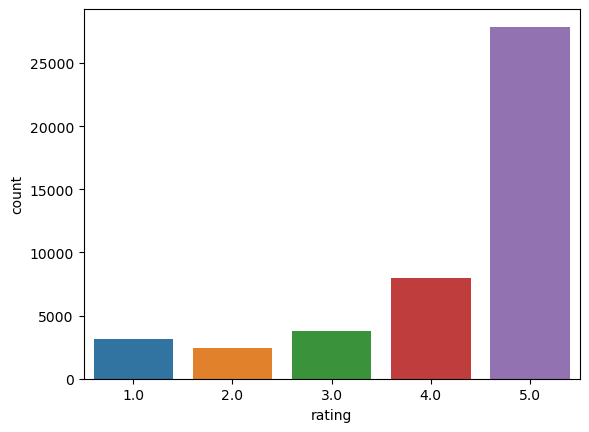

In [13]:
# the distribution of ratings 

sns.countplot(x='rating', data=data)

<Axes: xlabel='year', ylabel='count'>

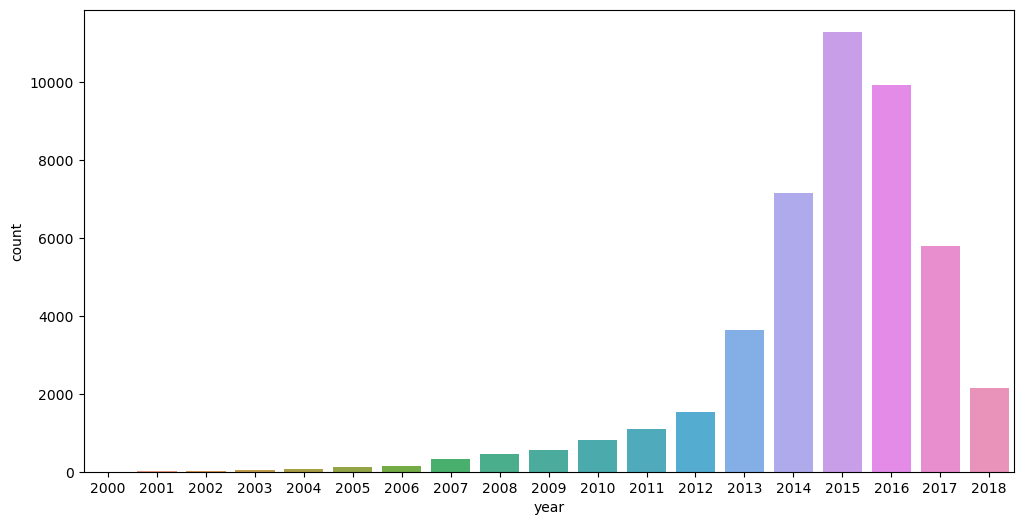

In [14]:
# the distribution of sales by year

plt.figure(figsize=(12,6))
sns.countplot(x='year', data=data)

<Axes: xlabel='brand', ylabel='count'>

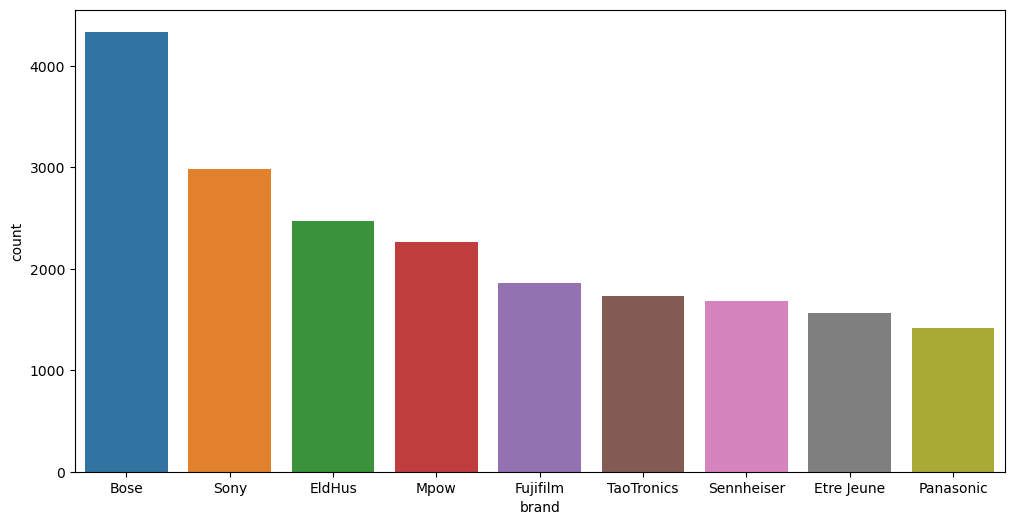

In [15]:
# brands with the most sales

plt.figure(figsize=(12,6))
sns.countplot(x='brand', data=data, order=data['brand'].value_counts().iloc[1:10].index)

We can see that the brand name of Bose sold the most followed by Sony.

<Axes: xlabel='brand', ylabel='count'>

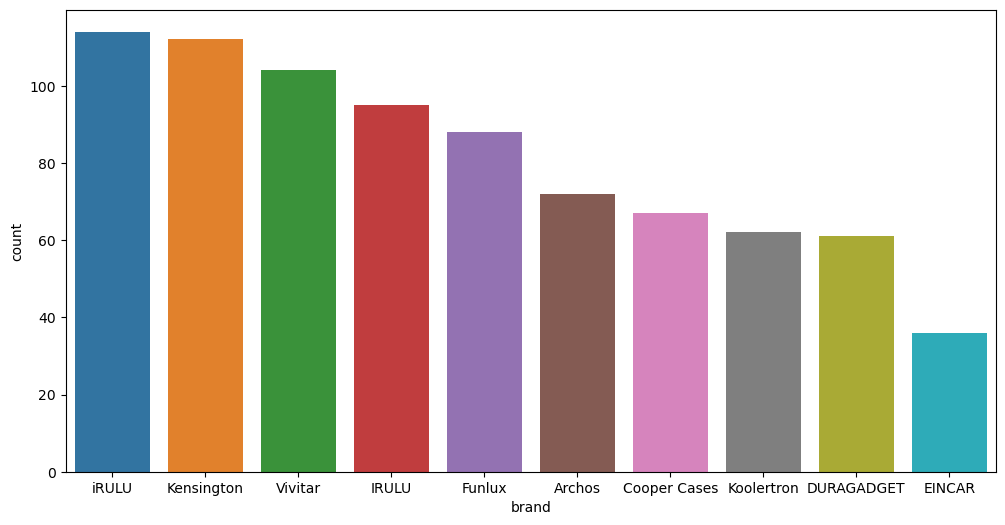

In [16]:
# What brand name sold the least?

plt.figure(figsize=(12,6))
sns.countplot(x='brand', data=data, order=data['brand'].value_counts().iloc[-10:].index)

We can see that the brand name of EINCAR sold the least followed closely with DURAGADGET.

<Axes: xlabel='brand', ylabel='count'>

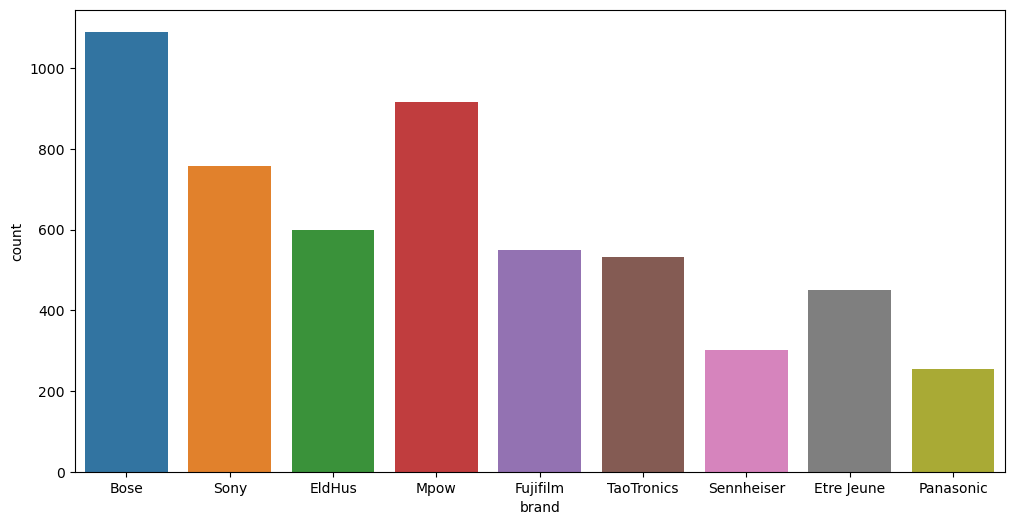

In [17]:
# brands with the most sales in 2015

plt.figure(figsize=(12,6))
sns.countplot(x='brand', data=data[data['year'] == 2015], order=data['brand'].value_counts().iloc[1:10].index)

<Axes: xlabel='brand', ylabel='count'>

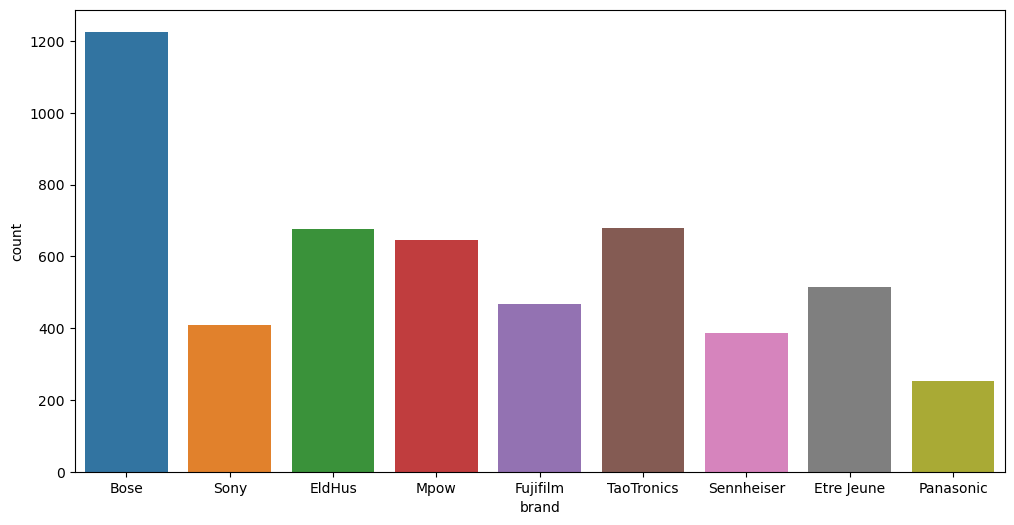

In [18]:
# brands with the most sales in 2016

plt.figure(figsize=(12,6))
sns.countplot(x='brand', data=data[data['year'] == 2016], order=data['brand'].value_counts().iloc[1:10].index)

<Axes: xlabel='brand', ylabel='count'>

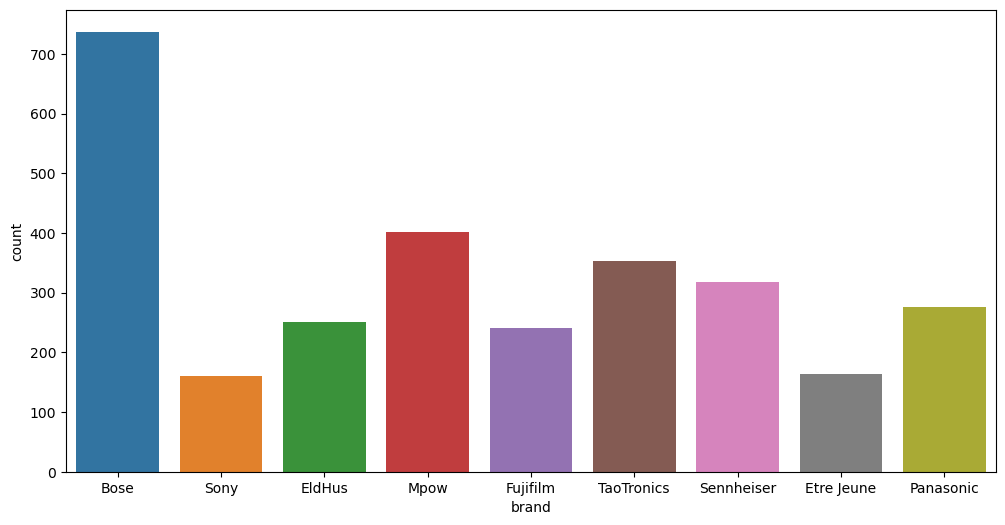

In [19]:
# brands with the most sales in 2017

plt.figure(figsize=(12,6))
sns.countplot(x='brand', data=data[data['year'] == 2017], order=data['brand'].value_counts().iloc[1:10].index)

<Axes: xlabel='month', ylabel='count'>

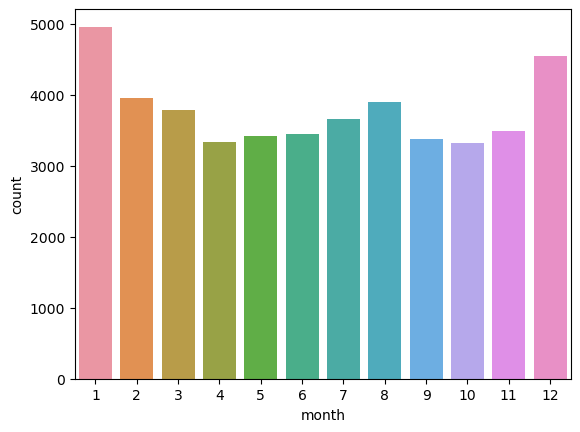

In [20]:
# month with most sales

sns.countplot(x='month', data=data)

January[#1] was the month with the most sales

<Axes: xlabel='category', ylabel='count'>

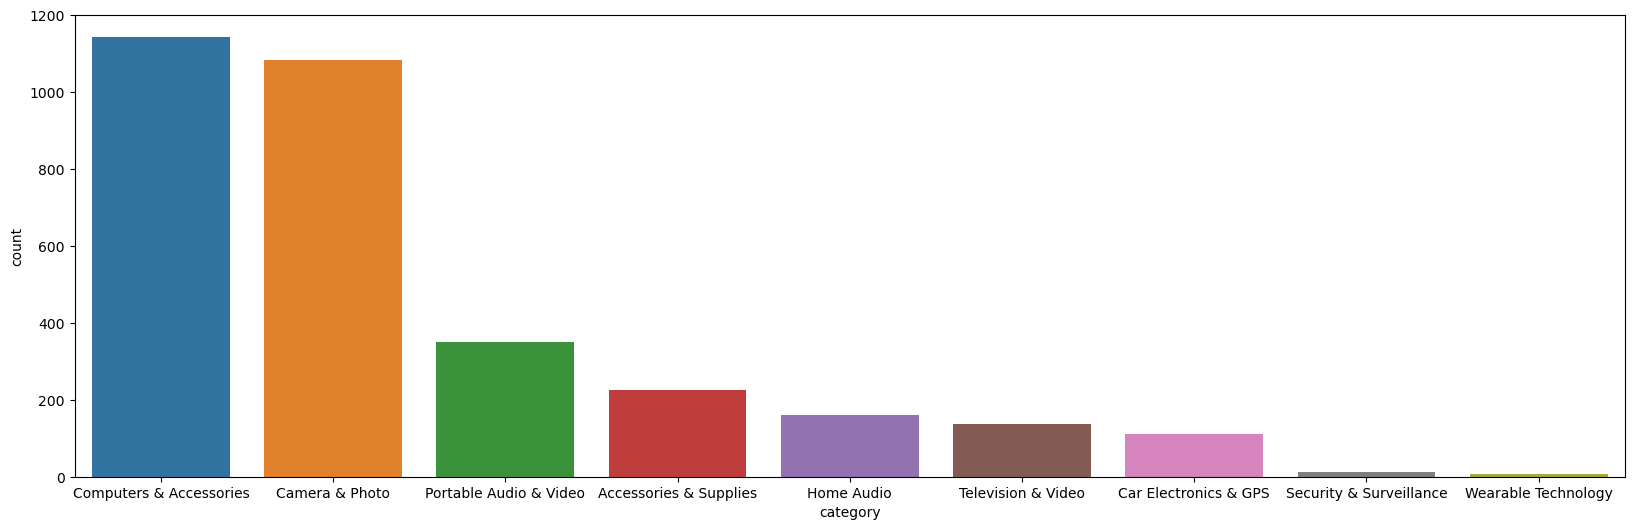

In [21]:
# What products by category were sold the most in January

plt.figure(figsize=(20,6))
sns.countplot(x='category', data=data[data['month'] == 1], order=data['category'].value_counts().iloc[1:10].index)

The top 3 products sold in January were Computers & Accesories, Camera & Photo and Portable Audio & Video 

<Axes: xlabel='category', ylabel='count'>

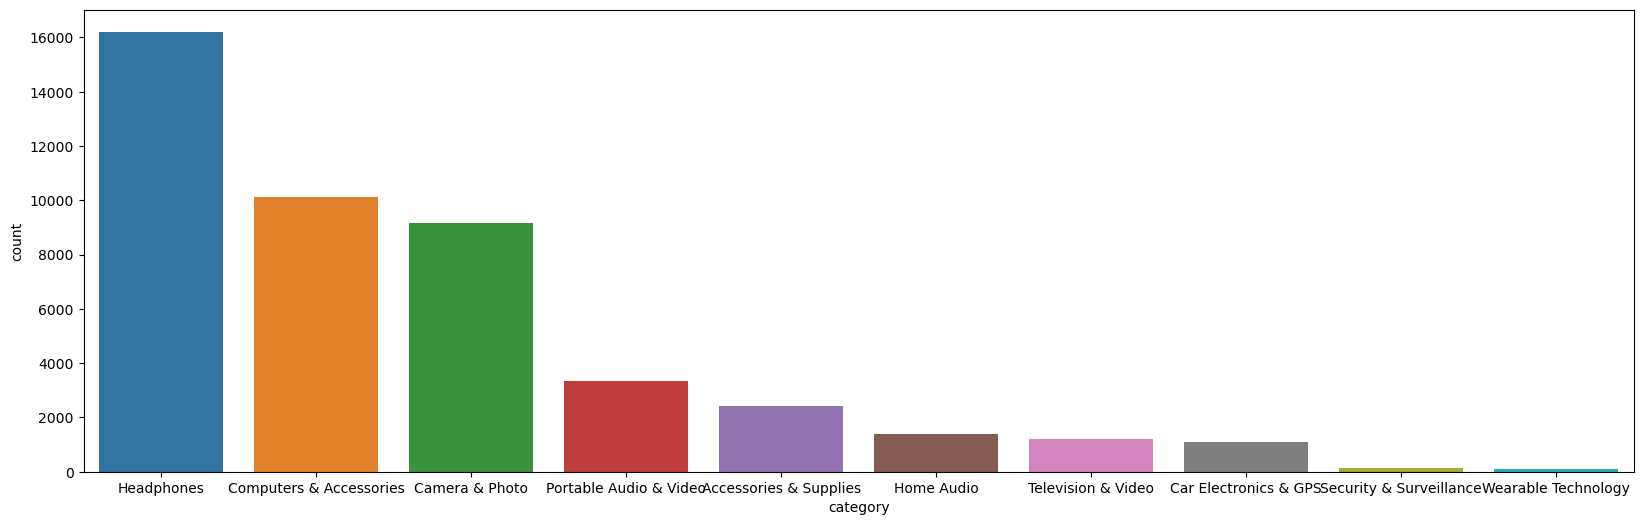

In [22]:
# Category with the least sales

plt.figure(figsize=(20,6))
sns.countplot(x='category', data=data, order=data['category'].value_counts().iloc[-10:].index)

The category with the least sales was Wearable Technology.

<Axes: ylabel='rating'>

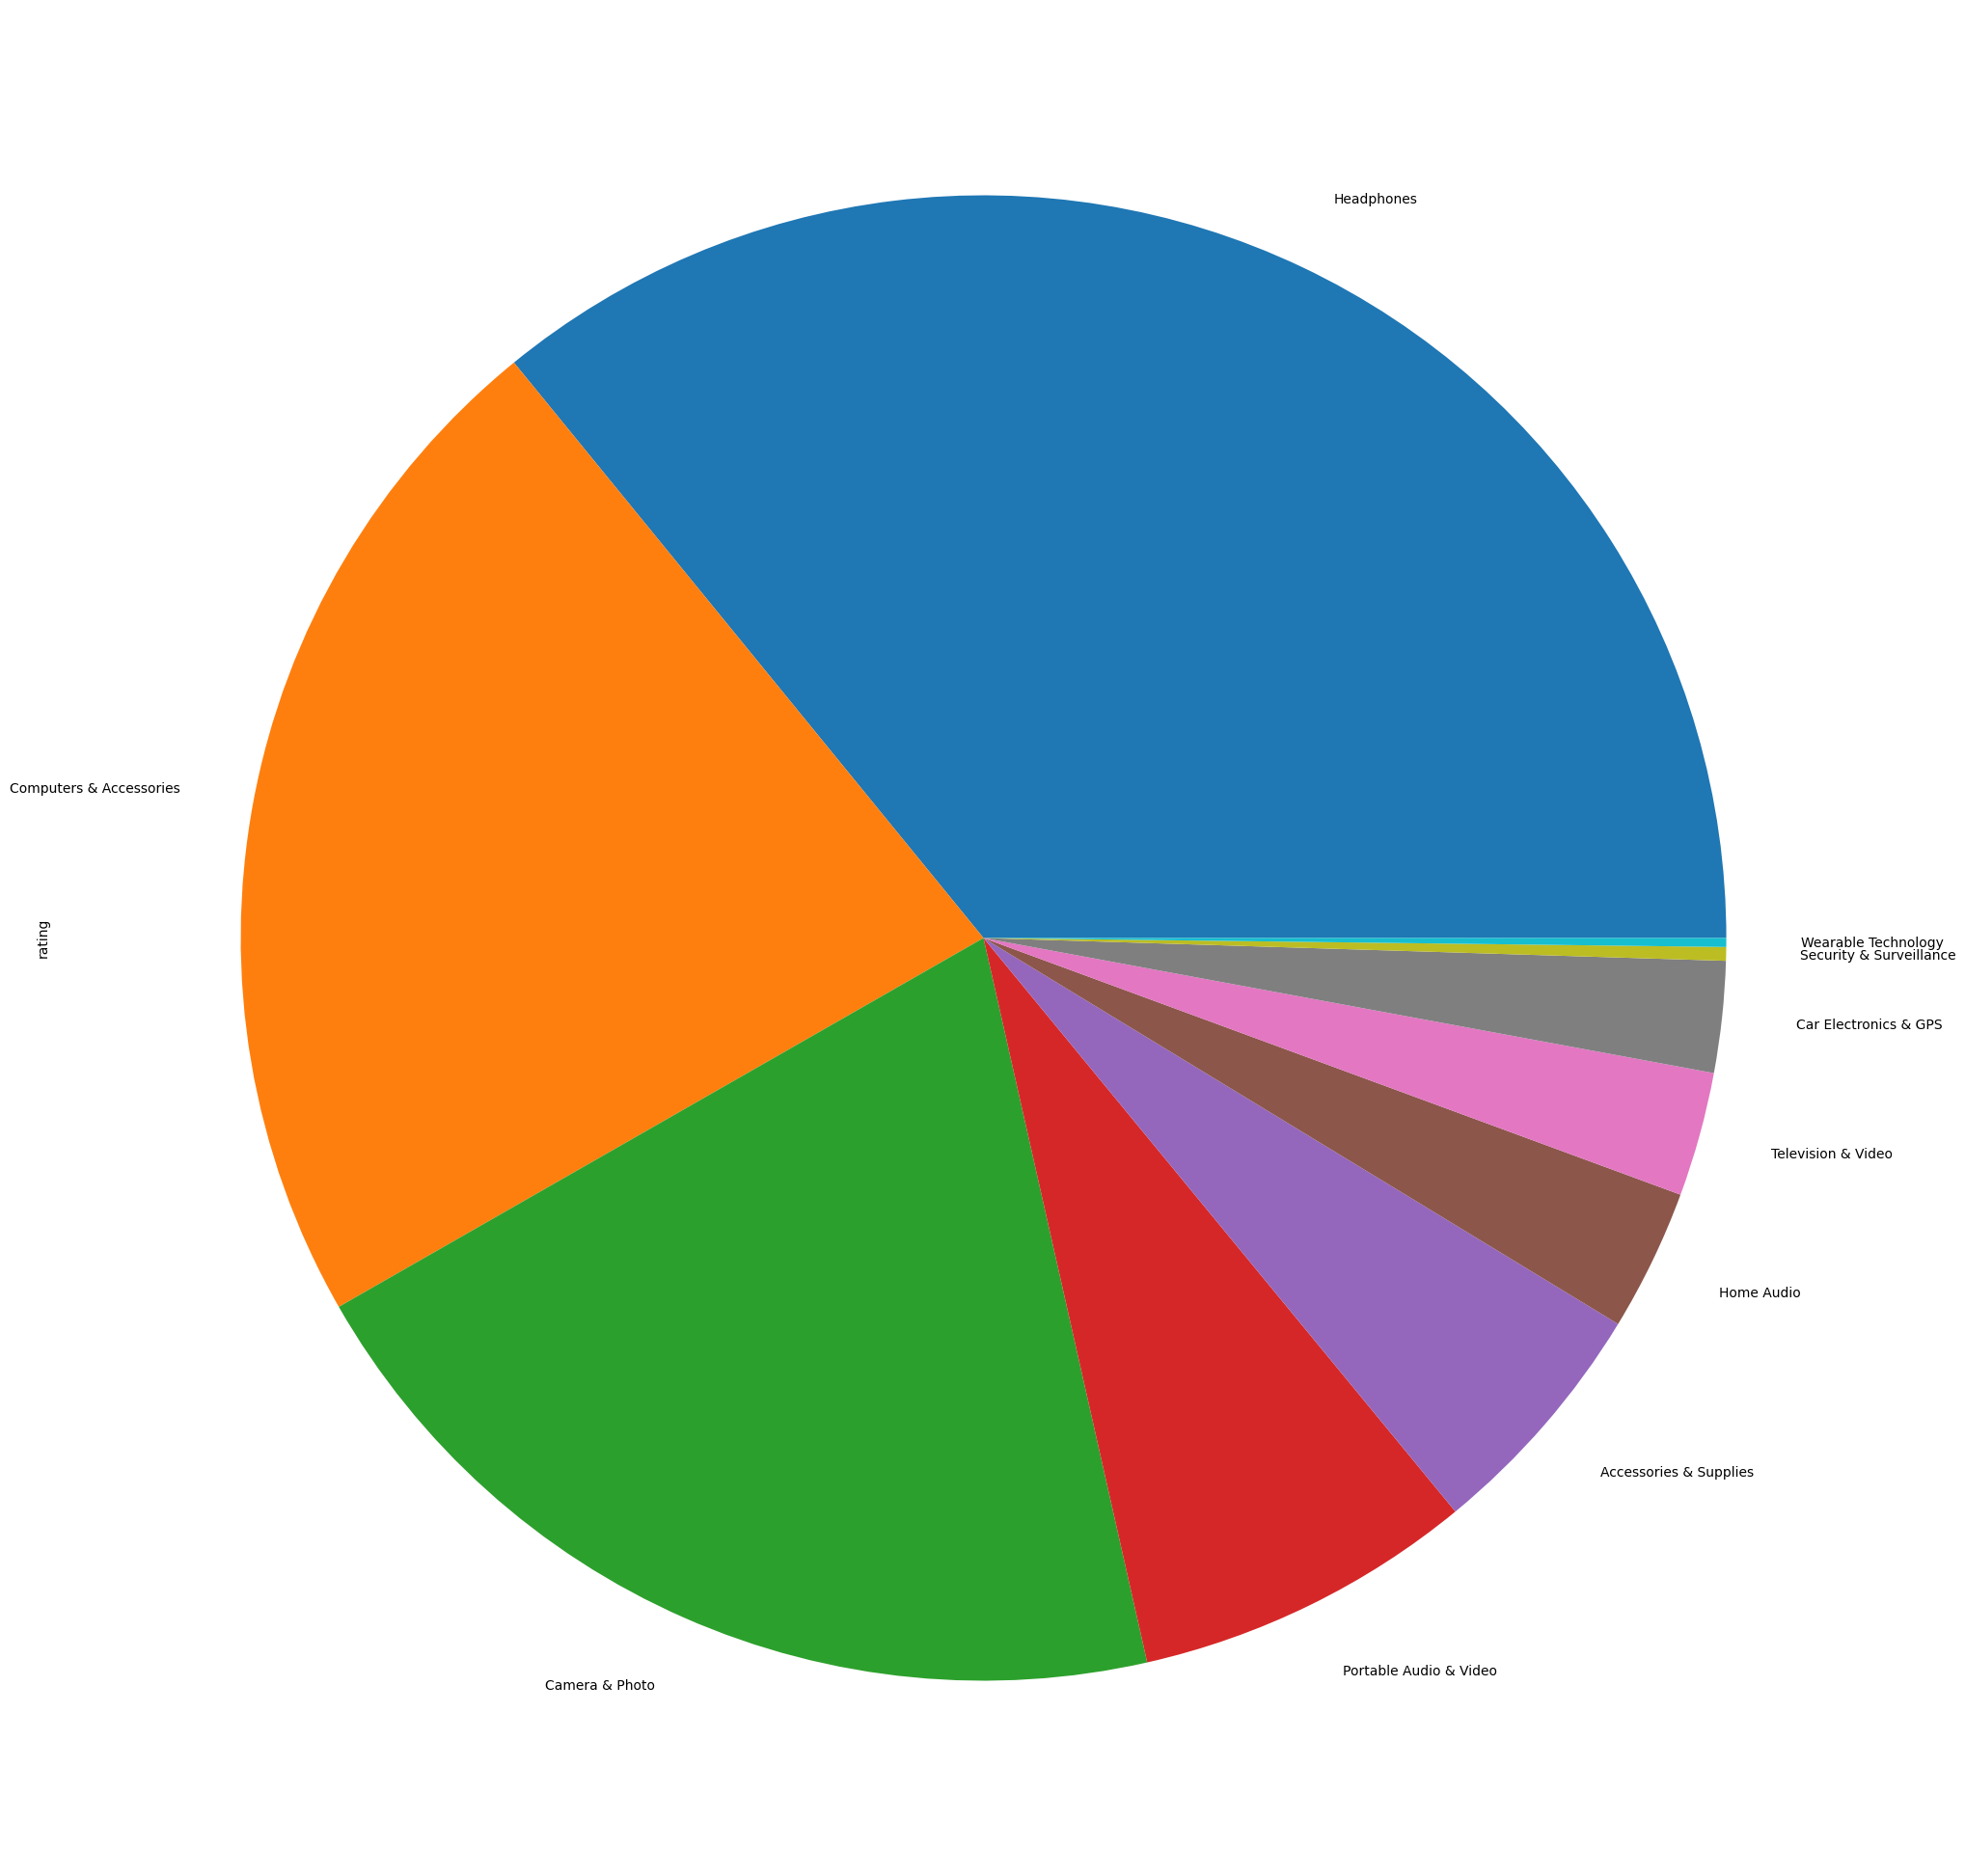

In [23]:
plt.figure(figsize=(50,25))
data.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

# conclusion of our analysis

- We can see that the year 2015 had the best sales.

- The month of January had the best sales.

- We can see that the brands Bose sold the most.

- We can see that the category of Headphones sold the most.

- We can see that the brand name of EINCAR sold the least followed closely with DURAGADGET.

- We can see that the category of Wearable Technology sold the least.